In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
dataset.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Analysing

<AxesSubplot:xlabel='Survived', ylabel='count'>

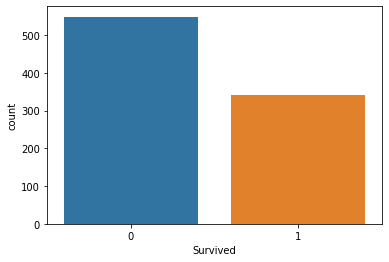

In [4]:
sns.countplot(x="Survived",data=dataset)

Deaths > Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

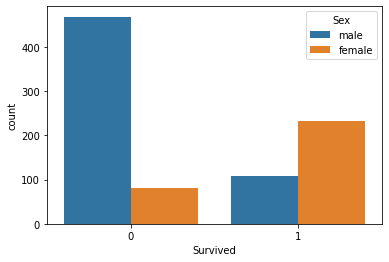

In [5]:
sns.countplot(x="Survived",data=dataset, hue="Sex")

more females survived than males

<AxesSubplot:xlabel='Survived', ylabel='count'>

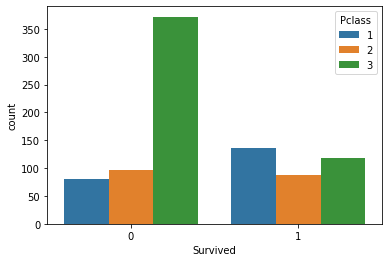

In [6]:
sns.countplot(x="Survived",data=dataset,hue="Pclass")

3rd class pasengers have died the most

<AxesSubplot:>

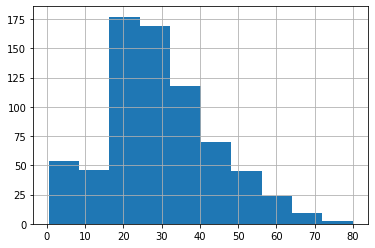

In [7]:
dataset["Age"].hist()

### Data wrangling

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
dataset.drop('Cabin',axis=1,inplace=True)

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now we have no null values

In [12]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)

In [13]:
pcl = pd.get_dummies(dataset['Pclass'])

In [14]:
embark = pd.get_dummies(dataset['Embarked'])

In [15]:
dataset=pd.concat([dataset,sex,pcl,embark], axis = 1)

In [16]:
dataset.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,1,0,0,0,0,1


In [17]:
dataset.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare','Embarked'],axis =1, inplace=True)


In [18]:
dataset

,Survived,Age,SibSp,Parch,male,1,2,3,C,Q,S
0,0,22.0,1,0,1,0,0,1,0,0,1
1,1,38.0,1,0,0,1,0,0,1,0,0
2,1,26.0,0,0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,1,0,0,0,0,1
4,0,35.0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,0,0,0,1,0,1,0
886,0,27.0,0,0,1,0,1,0,0,0,1
887,1,19.0,0,0,0,1,0,0,0,0,1
889,1,26.0,0,0,1,1,0,0,1,0,0


In [19]:
dataset.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
male          uint8
1             uint8
2             uint8
3             uint8
C             uint8
Q             uint8
S             uint8
dtype: object

### Train Data

In [20]:
X = dataset.drop('Survived',axis=1)
y = dataset['Survived']

In [21]:
X.dtypes

Age      float64
SibSp      int64
Parch      int64
male       uint8
1          uint8
2          uint8
3          uint8
C          uint8
Q          uint8
S          uint8
dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train,y_train)

c:\users\rishi kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [27]:
predictions = model.predict(X_test)

c:\users\rishi kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81        85\n           1       0.72      0.72      0.72        58\n\n    accuracy                           0.78       143\n   macro avg       0.77      0.77      0.77       143\nweighted avg       0.78      0.78      0.78       143\n'

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Confusin matrix
         |PredictedYes  PredictedNo
         |-------------------------
ActualYes|
ActualNo |

In [39]:
cm=confusion_matrix(y_test,predictions)
cm

array([[69, 16],
       [16, 42]], dtype=int64)

#### in this 69+42 values have shown correct results while 16+16 values have shown wrong results and thus the accuracy is (69+42)/(69+42+16+16)

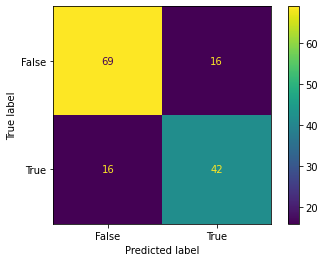

In [40]:
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
matrix.plot()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7762237762237763